In [39]:
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem.Scaffolds.MurckoScaffold import GetScaffoldForMol
from rdkit.Chem.Scaffolds.MurckoScaffold import MakeScaffoldGeneric
from rdkit.Chem.Draw import MolsToGridImage, IPythonConsole, MolToImage
from rdkit.Chem.Draw import rdMolDraw2D
from io import BytesIO
import base64
from IPython.core.display import HTML

In [10]:
# upload the vasopressin dataset
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

smiles = data["Smiles"]
smiles.fillna("", inplace = True)
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
data["molecule"] = molecules

# add Morgan fingerprints to the dataframe
data["morgan_fingerprint"] = data["molecule"].apply(Chem.GetMorganFingerprintAsBitVect, args = (2, ), nBits = 1024)

In [11]:
# upload the drugbank dataset
drugbank = [m for m in Chem.SDMolSupplier("../data/drugbank.sdf") if m]

RDKit ERROR: [11:43:44] ERROR: Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:04:47] Explicit valence for atom # 7 N, 4, is greater than permitted
RDKit ERROR: [12:04:47] ERROR: Could not sanitize molecule ending on line 20009
[11:43:44] ERROR: Explicit valence for atom # 0 C greater than permitted
[12:04:47] Explicit valence for atom # 7 N, 4, is greater than permitted
[12:04:47] ERROR: Could not sanitize molecule ending on line 20009
RDKit ERROR: [12:04:47] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:04:47] ERROR: Explicit valence for atom # 7 N, 4, is greater than permitted
[12:04:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10

RDKit ERROR: [12:04:48] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
RDKit ERROR: 
RDKit ERROR: [12:04:48] ERROR: Could not sanitize molecule ending on line 250947
[12:04:48] ERROR: Could not sanitize molecule ending on line 250947
RDKit ERROR: [12:04:48] ERROR: Can't kekulize

RDKit ERROR: [12:04:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[12:04:48] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9

[12:04:48] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:04:48] Explicit valence for atom # 56 O, 3, is greater than permitted
RDKit ERROR: [12:04:48] ERROR: Could not sanitize molecule ending on line 398455
[12:04:48] ERROR: Could not sanitize molecule ending on line 398455
RDKit ERROR: [12:04:48] ERROR: Explicit valence for atom # 56 O, 3, is greater than permitted
[12:04:48] ERROR: Explicit valence for atom # 56 O, 3, is greater than permitted
[12:04:48] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 18

RDKit ERROR: [12:04:48] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 18
RDKit ERROR: 
RDKit ERROR: [12:04:48] ERROR: Could not sanitize molecule ending on line 407765
[12:04:48] ERROR: Could not sanitize molecule ending on line 407765
RDKit ERROR: [12:04:48] ERRO

RDKit ERROR: [12:04:49] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
[12:04:49] ERROR: Explicit valence for atom # 2 O, 3, is greater than permitted
[12:04:49] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [12:04:49] Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [12:04:49] ERROR: Could not sanitize molecule ending on line 541262
[12:04:49] ERROR: Could not sanitize molecule ending on line 541262
RDKit ERROR: [12:04:49] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
RDKit ERROR: [12:04:49] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR: [12:04:49] ERROR: Could not sanitize molecule ending on line 557517
[12:04:49] ERROR: Explicit valence for atom # 6 B, 4, is greater than permitted
[12:04:49] Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20

RDKit ERROR: [12:04:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 2 3 17 19 20
RDKit ERROR: 
RDKit ERROR

RDKit ERROR: [12:04:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10
[12:04:49] ERROR: Can't kekulize mol.  Unkekulized atoms: 0 1 2 4 5 6 7 8 9 10

[12:04:51] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: 
RDKit ERROR: [12:04:51] Explicit valence for atom # 0 Be, 3, is greater than permitted
RDKit ERROR: [12:04:51] ERROR: Could not sanitize molecule ending on line 995692
[12:04:51] ERROR: Could not sanitize molecule ending on line 995692
RDKit ERROR: [12:04:51] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
[12:04:51] ERROR: Explicit valence for atom # 0 Be, 3, is greater than permitted
[12:04:51] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:04:51] Explicit valence for atom # 0 C greater than permitted
RDKit ERROR: [12:04:51] ERROR: Could not sanitize molecule ending on line 1151592
[12:04:51] ERROR: Could not sanitize molecule ending on line 1151592


In [12]:
# create the drugbank dataframe
drugbank_morgan_fingerprint = [Chem.GetMorganFingerprintAsBitVect(m, 2, nBits = 1024) for m in drugbank]
drugbank_formulas = [m.GetProp("FORMULA") for m in drugbank]
drugbank_generics = [m.GetProp("GENERIC_NAME") for m in drugbank]

drugbank_df = pd.DataFrame([drugbank_formulas, drugbank_generics, drugbank, drugbank_morgan_fingerprint]).transpose()
drugbank_df.columns = ["formula", "generic_name", "molecule", "morgan_fingerprint"]

In [13]:
# function to return the silimarity index of two bit vectors
def tanimoto_index(bit_vector1, bit_vector2):
    intersect = [bit1 and bit2 for bit1, bit2 in zip(bit_vector1, bit_vector2)]
    union = [bit1 or bit2 for bit1, bit2 in zip(bit_vector1, bit_vector2)]
    try:
        index = sum(intersect) / sum(union)
    except ZeroDivisionError:
        return 0
    return index

## Scaffolds

In [16]:
# create three different levels of scaffolds for the vasopressin dataset
data["scaffold"] = data["molecule"].apply(GetScaffoldForMol)
data["scaffold_generic"] = data["scaffold"].apply(MakeScaffoldGeneric)
data["scaffold_scaffold_generic"] = data["scaffold_generic"].apply(GetScaffoldForMol)

In [60]:
def third_scaffold_drugbank(molecule):
    Chem.rdmolops.RemoveStereochemistry(molecule)
    scaffold = GetScaffoldForMol(molecule)
    try:
        scaffold_generic = MakeScaffoldGeneric(scaffold)
    except ValueError:
        return None
    
    try:
        scaffold_scaffold_generic = GetScaffoldForMol(scaffold_generic)
    except ValueError:
        return None
    
    return scaffold_scaffold_generic

In [64]:
drugbank_df["scaffold_scaffold_generic"] = drugbank_df["molecule"].apply(third_scaffold_drugbank)

RDKit ERROR: [12:34:59] Explicit valence for atom # 48 C, 5, is greater than permitted
[12:34:59] Explicit valence for atom # 48 C, 5, is greater than permitted
RDKit ERROR: [12:34:59] Explicit valence for atom # 41 C, 5, is greater than permitted
[12:34:59] Explicit valence for atom # 41 C, 5, is greater than permitted
RDKit ERROR: [12:35:00] Explicit valence for atom # 30 C, 6, is greater than permitted
[12:35:00] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit ERROR: [12:35:00] Explicit valence for atom # 14 C, 10, is greater than permitted
[12:35:00] Explicit valence for atom # 14 C, 10, is greater than permitted
RDKit ERROR: [12:35:01] Explicit valence for atom # 28 C, 5, is greater than permitted
[12:35:01] Explicit valence for atom # 28 C, 5, is greater than permitted
RDKit ERROR: [12:35:02] Explicit valence for atom # 30 C, 6, is greater than permitted
[12:35:02] Explicit valence for atom # 30 C, 6, is greater than permitted
RDKit WARNING: [12:35:02] WARNIN

In [67]:
data["scaffold_smiles"] = data["scaffold_scaffold_generic"].apply(Chem.MolToSmiles)

In [69]:
drugbank_df["scaffold_smiles"] = [Chem.MolToSmiles(mol) if mol else None for mol in drugbank_df["scaffold_scaffold_generic"]]

In [70]:
data_scaffold_counts = data["scaffold_smiles"].value_counts()
data_scaffold_counts = data_scaffold_counts.sort_values(ascending = False)

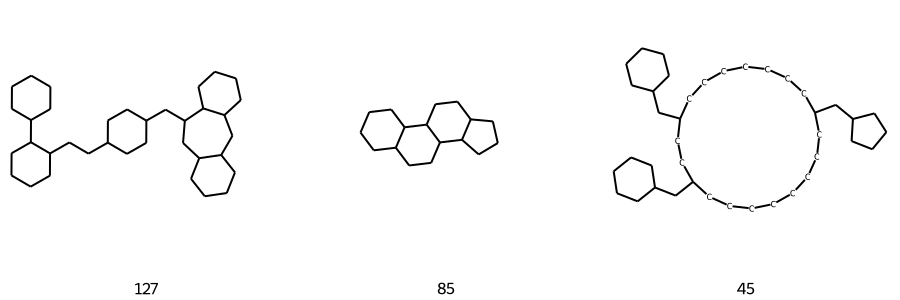

In [71]:
# visualize second to fifth most common scaffolds
legend = [str(v) for v in data_scaffold_counts.values]
to_draw = [Chem.MolFromSmiles(m) for m in data_scaffold_counts.index]
to_draw = [m for m in to_draw if m]
# MolToImage(to_draw[0])
MolsToGridImage(to_draw[2:5], subImgSize = (300, 300), legends = legend)

In [72]:
data_top_ten_scaffold_smiles = data_scaffold_counts.index[:10]
data["top_ten_scaffolds"] = data["scaffold_smiles"].apply(str).isin(data_top_ten_scaffold_smiles)

In [73]:
drugbank_scaffold_counts = drugbank_df["scaffold_smiles"].value_counts()
drugbank_scaffold_counts = drugbank_scaffold_counts.sort_values(ascending = False)

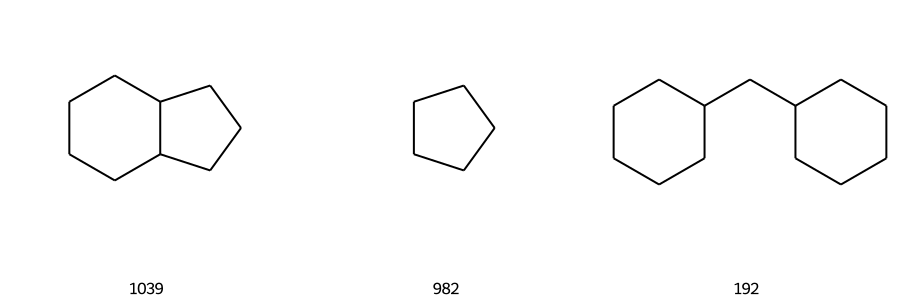

In [74]:
# visualize second to fifth most common scaffolds
legend = [str(v) for v in drugbank_scaffold_counts.values]
to_draw = [Chem.MolFromSmiles(m) for m in drugbank_scaffold_counts.index]
to_draw = [m for m in to_draw if m]
MolsToGridImage(to_draw[2:5], subImgSize = (300, 300), legends = legend)

In [27]:
def mol2display_png(mol):
    """Format RDKit mol for direct inline display."""
    d2d = rdMolDraw2D.MolDraw2DCairo(400, 400)
    d2d.DrawMolecule(mol)
    d2d.FinishDrawing()
    buffer = BytesIO(d2d.GetDrawingText())
    return f'<img src="data:image/png;base64,{base64.b64encode(buffer.getvalue()).decode()}">'

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Comment,Uo Units,Ligand Efficiency BEI,Ligand Efficiency LE,Ligand Efficiency LLE,Ligand Efficiency SEI,Potential Duplicate,Assay ChEMBL ID,Assay Description,Assay Type,BAO Format ID,BAO Label,Assay Organism,Assay Tissue ChEMBL ID,Assay Tissue Name,Assay Cell Type,Assay Subcellular Fraction,Assay Parameters,Assay Variant Accession,Assay Variant Mutation,Target ChEMBL ID,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,molecule,morgan_fingerprint,scaffold,scaffold_generic,scaffold_scaffold_generic,scaffold_smiles,top_ten_scaffolds,molecule_image
0,CHEMBL1085301,NaN,0,403.52,1,6.15,13a,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-c1coc2ccccc12,Ki,'=',3.80,nM,8.42,NaN,NaN,UO_0000065,20.87,0.38,2.27,19.73,False,CHEMBL1120488,Displacement [3H]Arg human recombinant Vasopressin V1a receptor,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL1889,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",,,,C1CC2CC(C1)C(CC1CCC(C3CCC4CCCCC43)CC1)C2,False,
1,CHEMBL1084008,NaN,0,402.54,1,5.88,13f,COc1cc(C(=O)N2C[C@]3(C)C[C@H]2CC(C)(C)C3)ccc1-c1c[nH]c2ccccc12,Ki,'=',0.10,nM,10.00,NaN,NaN,UO_0000065,24.84,0.46,4.12,22.06,False,CHEMBL1120488,Displacement [3H]Arg human recombinant Vasopressin V1a receptor,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL1889,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1155536,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2010.0,None,NaN,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",,,,C1CC2CC(C1)C(CC1CCC(C3CCC4CCCCC43)CC1)C2,False,
2,CHEMBL4173250,NaN,0,524.63,1,3.99,3c,Cn1ncc2c1Nc1ccccc1N(C(=O)Cc1ccc(N3CCN(Cc4cc(O)cc(O)c4)CC3)cc1)C2,Ki,'=',795.10,nM,6.10,NaN,NaN,UO_0000065,11.63,0.21,2.11,6.28,False,CHEMBL4141652,Displacement of [3H]-vasopressin from human vasopressin V1a receptor expressed in HEK293 cell membranes after 90 mins by radioligand binding assay,B,BAO_0000219,cell-based format,Homo sapiens,None,None,HEK293,None,NaN,NaN,NaN,CHEMBL1889,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL4138154,1,Scientific Literature,Eur J Med Chem,2018.0,None,NaN,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]",,,,C1CCC(CC2CCC(C3CCC(CCC4CC5CCCC5CC5CCCCC54)CC3)CC2)CC1,False,
3,CHEMBL382301,ATOSIBAN,4,994.21,3,-3.04,Atosiban,CCOc1ccc(C[C@H]2NC(=O)CCSSC[C@@H](C(=O)N3CCC[C@H]3C(=O)N[C@@H](CCCN)C(=O)NCC(N)=O)NC(=O)[C@H](CC(N)=O)NC(=O)[C@H]([C@@H](C)O)NC(=O)[C@H]([C@@H](C)CC)NC2=O)cc1,Ki,'=',0.15,nM,9.82,NaN,NaN,UO_0000065,9.88,0.20,12.86,2.69,False,CHEMBL946023,Binding affinity to human vasopressin V1a receptor,B,BAO_0000357,single protein format,Homo sapiens,None,None,None,None,NaN,NaN,NaN,CHEMBL1889,Vasopressin V1a receptor,Homo sapiens,SINGLE PROTEIN,CHEMBL1142309,1,Scientific Literature,Bioorg. Med. Chem. Lett.,2008.0,None,NaN,
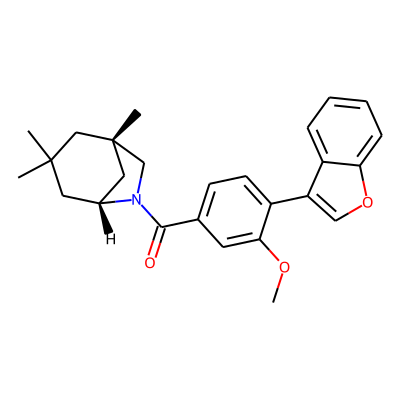
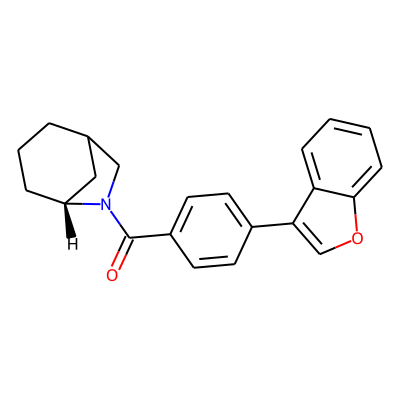
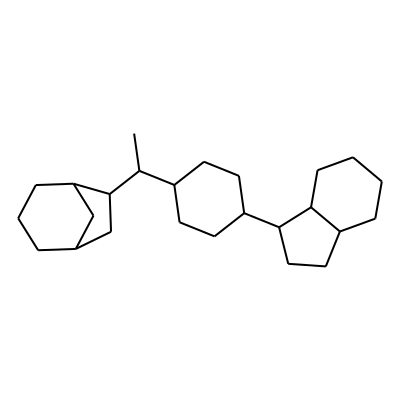
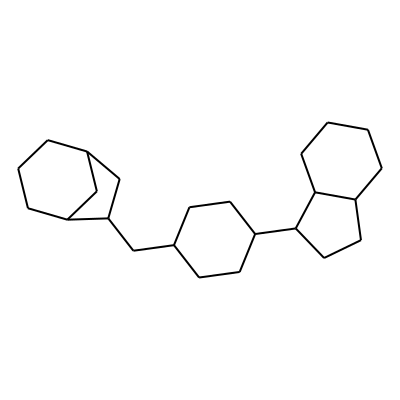
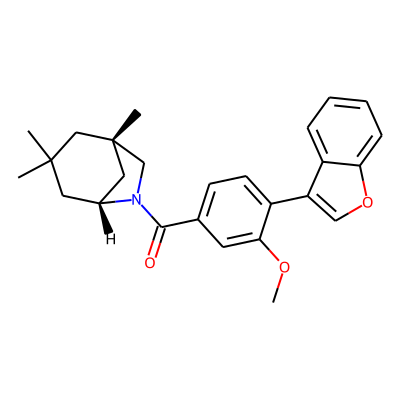
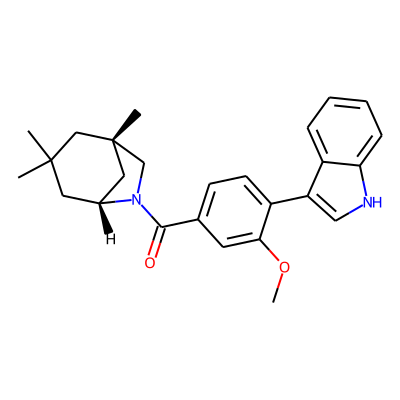
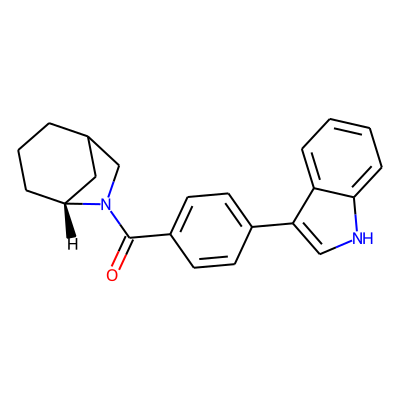
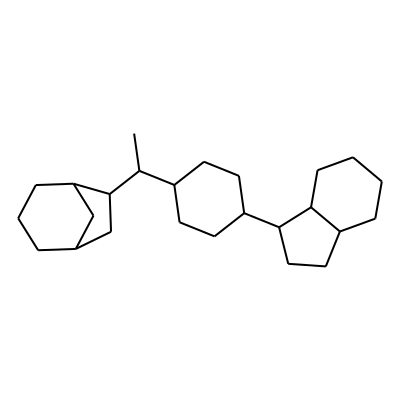
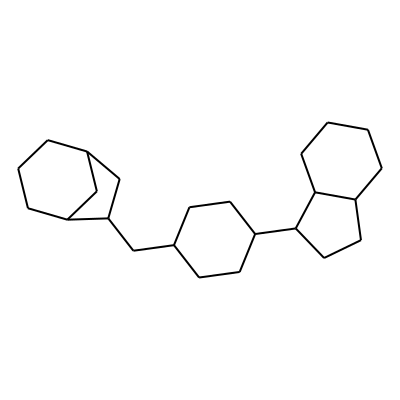
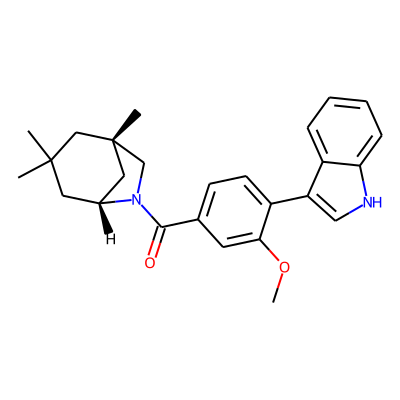
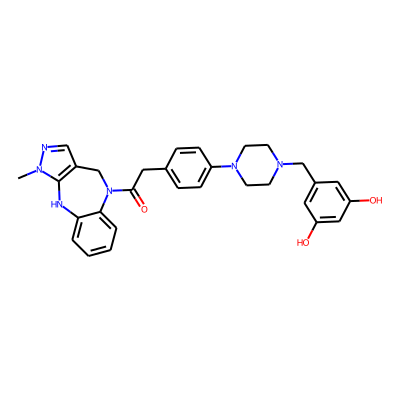
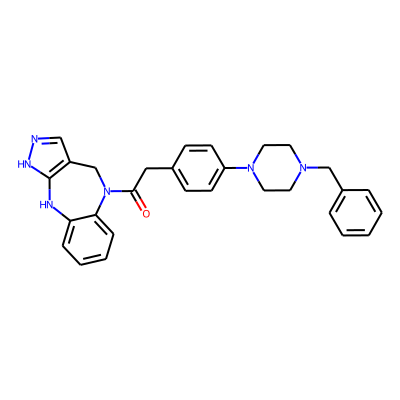
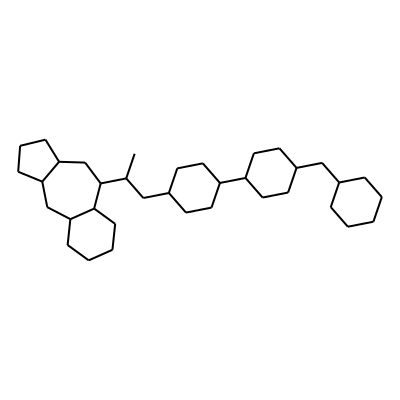
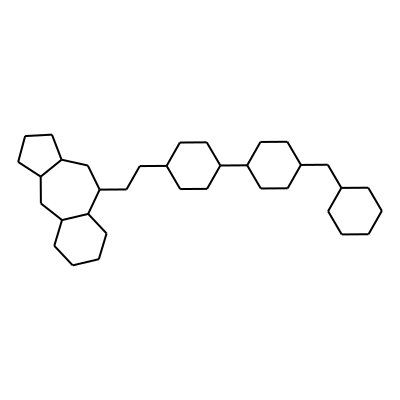
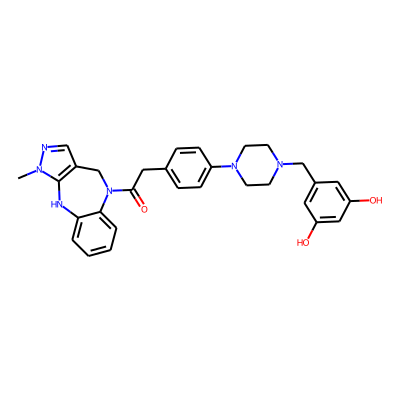
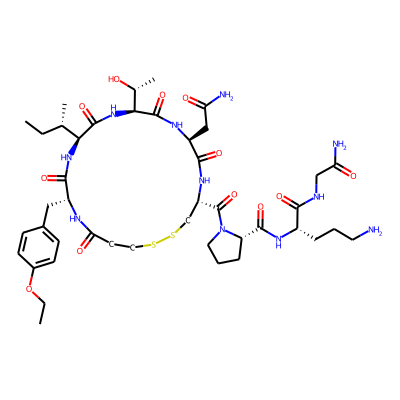
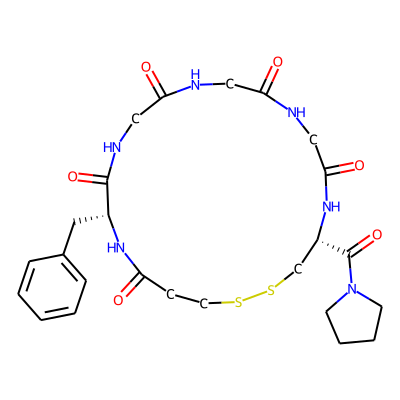
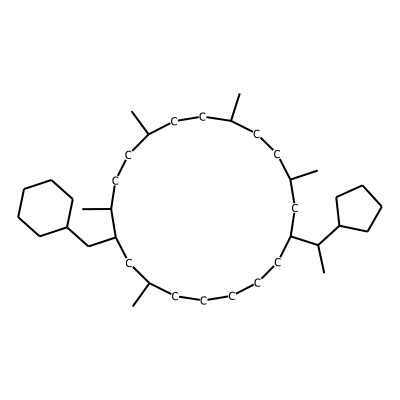
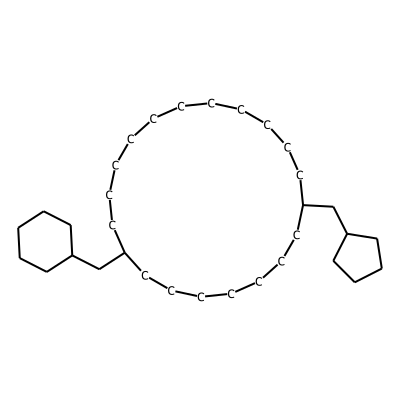
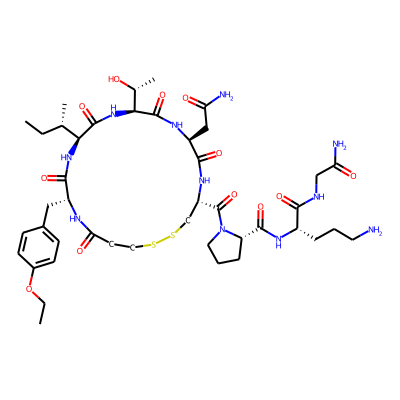
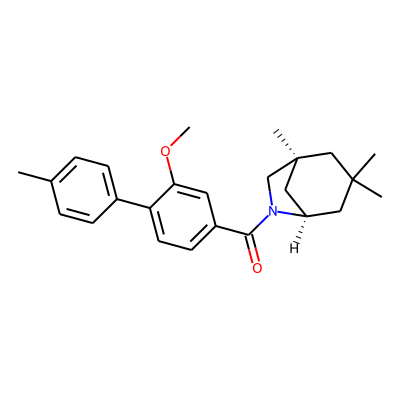
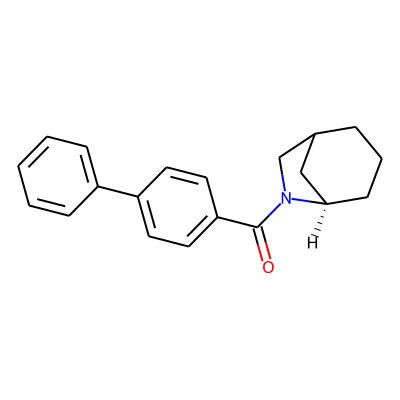
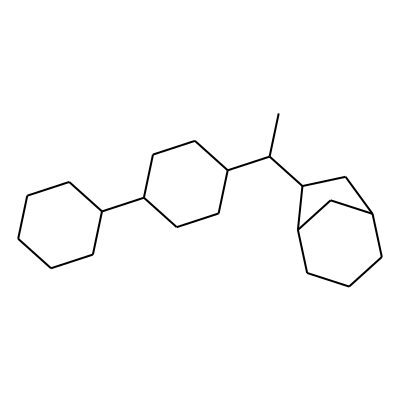
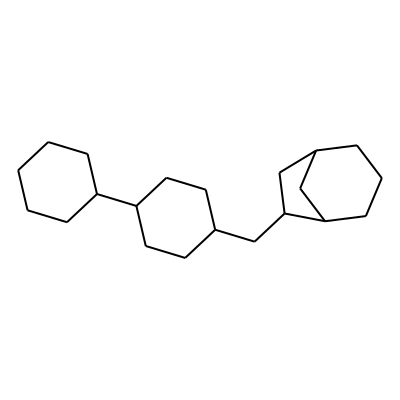
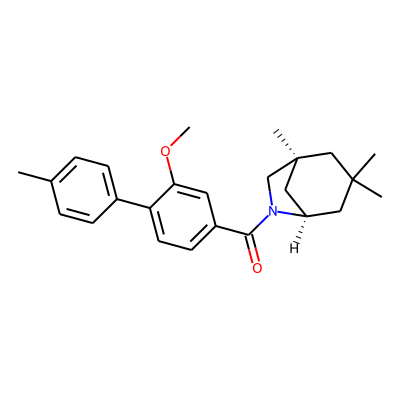

In [75]:
HTML(data.head().to_html(formatters = {"molecule": mol2display_png, "scaffold": mol2display_png, "scaffold_generic": mol2display_png, "scaffold_scaffold_generic": mol2display_png}, escape = False))

,molecule,scaffold_scaffold_generic,scaffold_smiles
0,,,C1CC2CC(C1)C(CC1CCC(C3CCC4CCCCC43)CC1)C2
1,,,C1CC2CC(C1)C(CC1CCC(C3CCC4CCCCC43)CC1)C2
2,,,C1CCC(CC2CCC(C3CCC(CCC4CC5CCCC5CC5CCCCC54)CC3)CC2)CC1
3,,,C1CCCCCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCCCC1
4,,,C1CCC(C2CCC(CC3CC4CCCC3C4)CC2)CC1

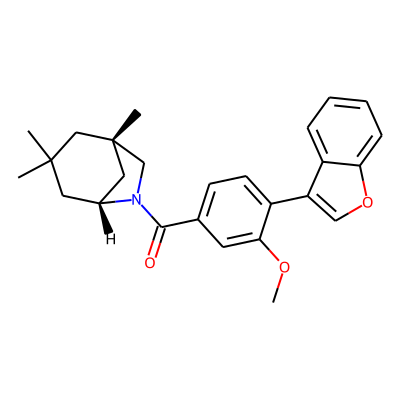
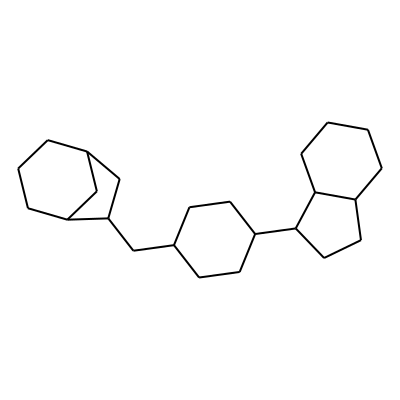
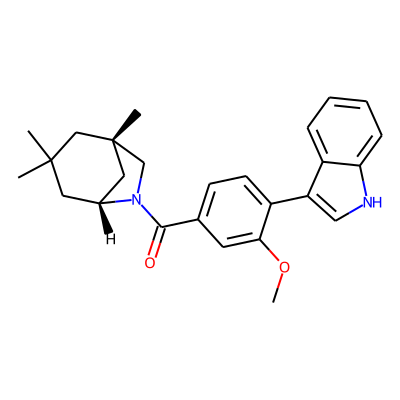
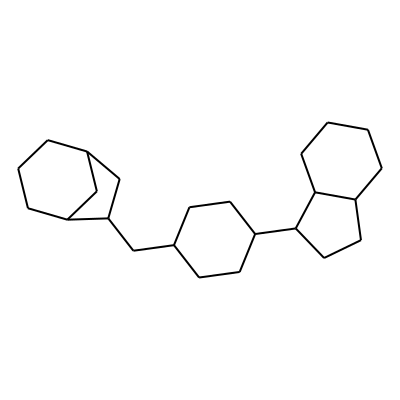
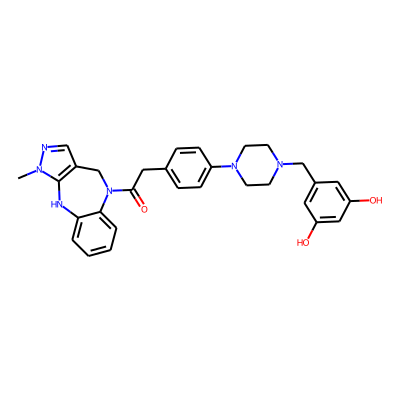
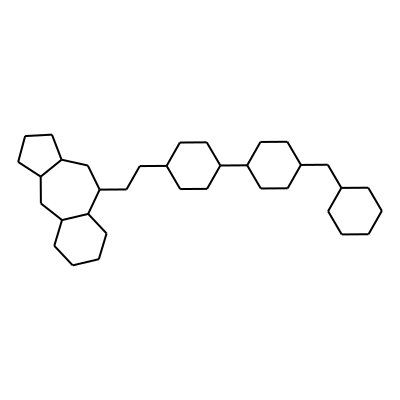
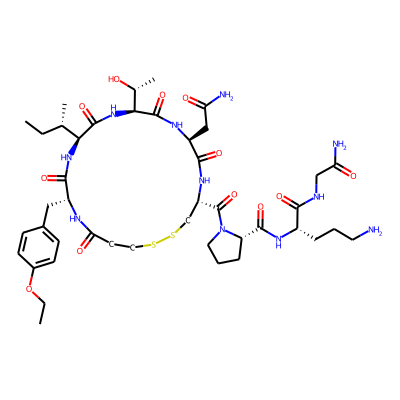
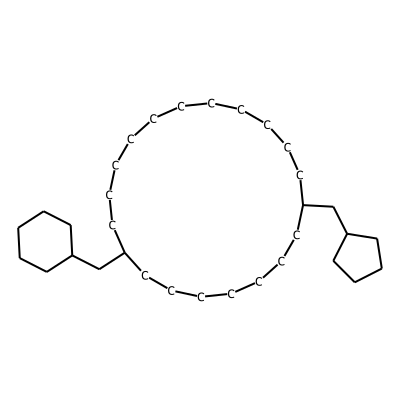
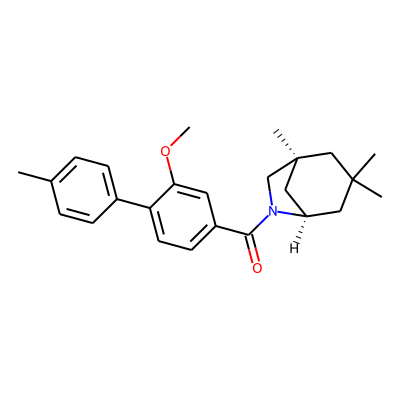
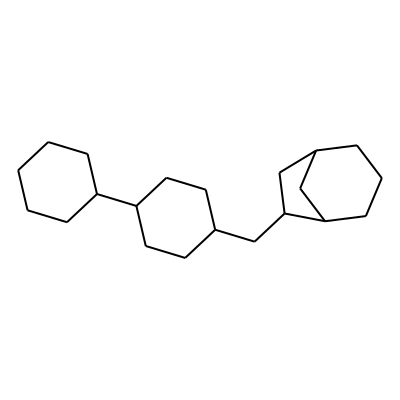

In [76]:
HTML(data[["molecule", "scaffold_scaffold_generic", "scaffold_smiles"]].head().to_html(formatters = {"molecule": mol2display_png, "scaffold_scaffold_generic": mol2display_png}, escape = False))

,molecule,scaffold_scaffold_generic,scaffold_smiles
0,,,C(CCCCCCCCCCCC(CCCCCCCCCCC1CCCC1CCCCCCCCCCC1CCCCC1)CC1CCCCC1)CCCCCCCCCCCC1CCCC1CCCCC1CCCC1CCCC1CCCCC1
1,,,C(CCCCCC(CCCCCC(CCC(CCC1CCCC1)CC1CCCC1)CC1CCC2CCCCC21)CC1CCCCC1)CCCCC1CCCC1
2,,,C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1
3,,,C(CCCCCC(CCCCCC(CCC(CCCCC1CCC2CCCCC2C1)CC1CCCCC1)CC1CCCCC1)CC1CCCCC1)CCCCC1CCCC1
4,,,C1CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC1

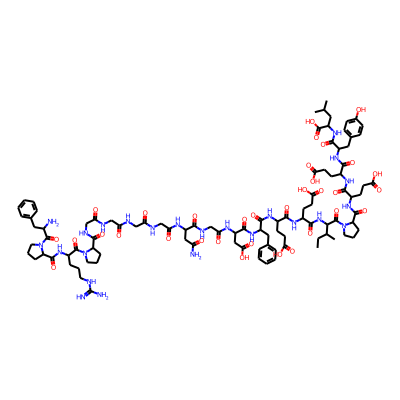
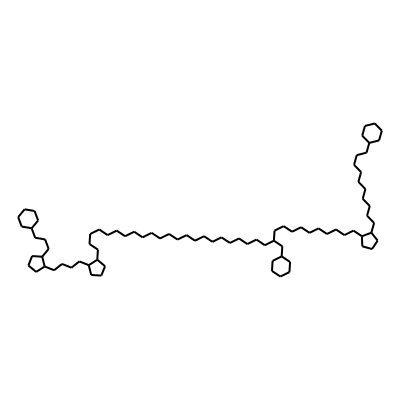
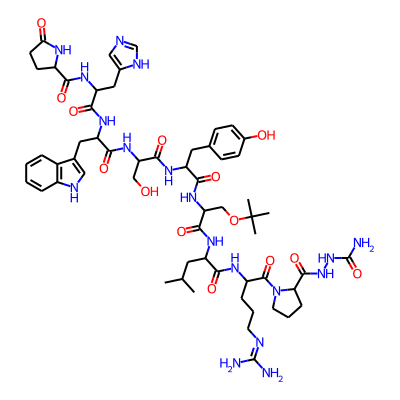
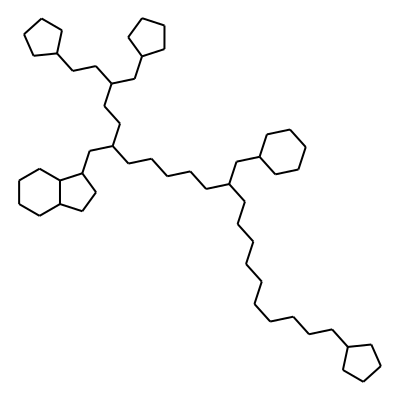
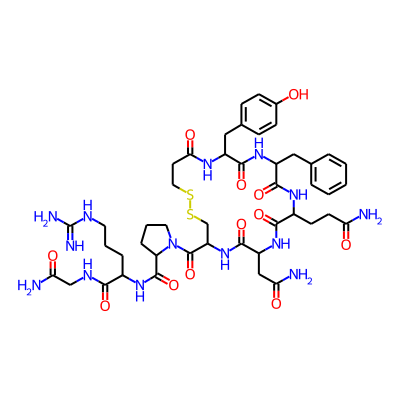
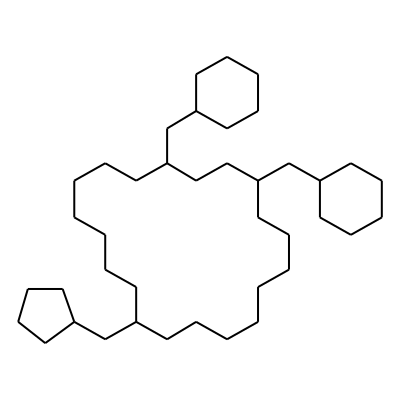
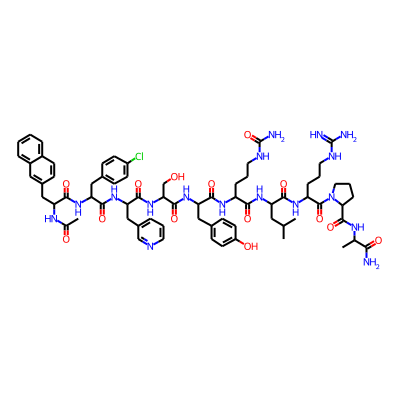
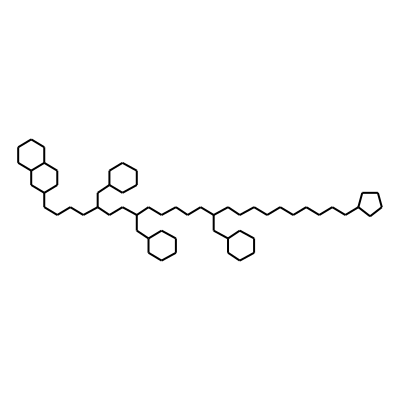
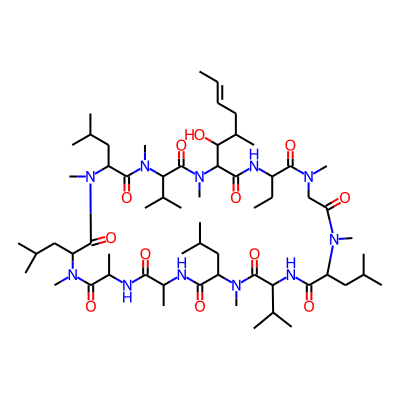
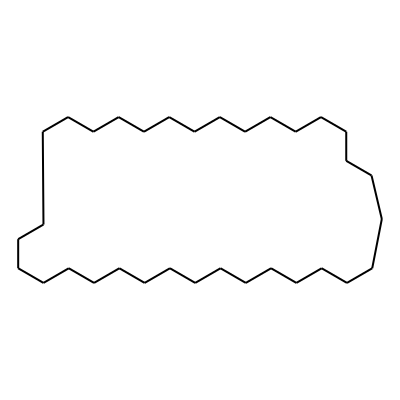

In [77]:
HTML(drugbank_df[["molecule", "scaffold_scaffold_generic", "scaffold_smiles"]].head().to_html(formatters = {"molecule": mol2display_png, "scaffold_scaffold_generic": mol2display_png}, escape = False))

In [88]:
data_scaffold_counts = pd.DataFrame(data["scaffold_smiles"].value_counts())
data_scaffold_counts["molecule"] = data_scaffold_counts.index.map(Chem.MolFromSmiles)
data_scaffold_counts

,scaffold_smiles,molecule
C1CCCCC1,127,<rdkit.Chem.rdchem.Mol object at 0x7f9ebb2584e0>
,85,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a4f30>
C1CCC(C2CCCCC2CCC2CCC(CC3CC4CCCCC4CC4CCCCC43)CC2)CC1,45,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a4cb0>
C1CCC2C(C1)CCC1C3CCCC3CCC21,43,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a46c0>
C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1,41,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a45d0>
...,...,...
C(CCCCCC1CCCC1CCCCCCCC1CCCCC1)CCCCC(CCC(CCC1CCC(CC2CCCCC2)CC1)CC1CCCCC1)CC1CCCCC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ed4b03f80>
C1CCC(CCCC2CCC(CC3CCC(C4CCCC5CCCCC54)CC3)CC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1030>
C1CCC(CCC2CCC(CC3CCC(C4CCCC5CCCCC54)CC3)CC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1080>
C1CCC(CCCC(CC2CCC(CCC3CCCCC3)CC2)C2CC(C3CCCC3C3CCCCC3)C2CCC2CCCCC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a10d0>


,scaffold_smiles,molecule
C1CCCCC1,127,
,85,
C1CCC(C2CCCCC2CCC2CCC(CC3CC4CCCCC4CC4CCCCC43)CC2)CC1,45,
C1CCC2C(C1)CCC1C3CCCC3CCC21,43,
C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1,41,

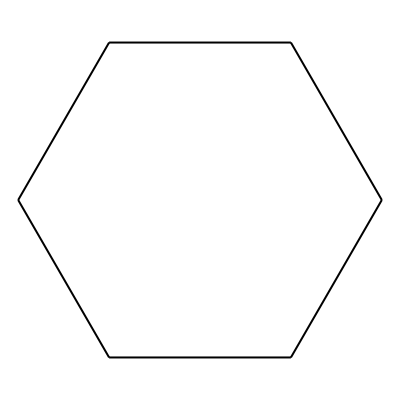
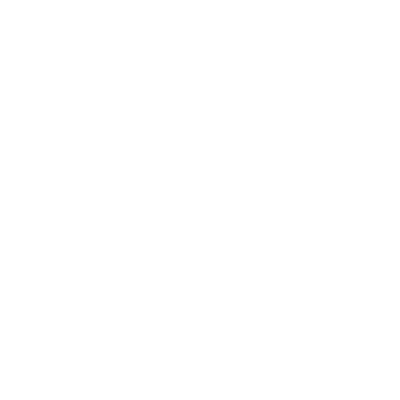
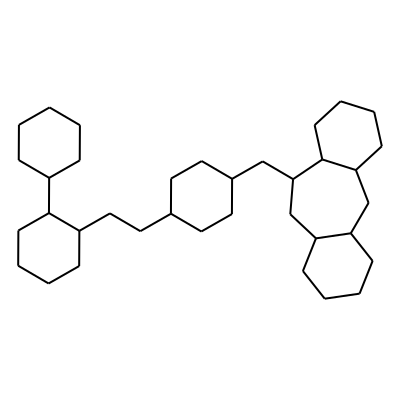
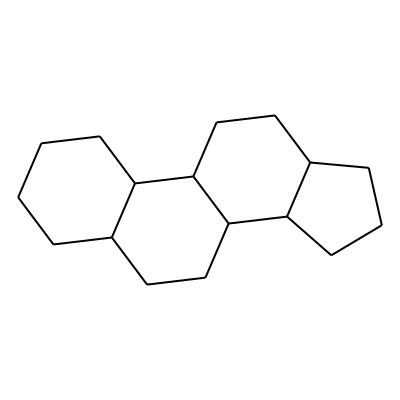
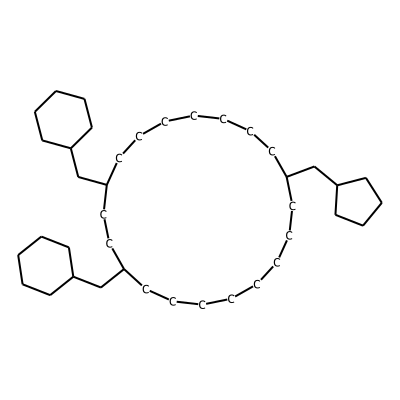

In [89]:
HTML(data_scaffold_counts.head().to_html(formatters = {"molecule": mol2display_png}, escape = False))

In [103]:
data_scaffold_counts["scaffold_probability"] = data_scaffold_counts["scaffold_smiles"].apply(lambda x: (x / len(data)) * 100)
data_scaffold_counts

,scaffold_smiles,molecule,scaffold_percentage,scaffold_probability
C1CCCCC1,127,<rdkit.Chem.rdchem.Mol object at 0x7f9ebb2584e0>,7.396622,7.396622
,85,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a4f30>,4.950495,4.950495
C1CCC(C2CCCCC2CCC2CCC(CC3CC4CCCCC4CC4CCCCC43)CC2)CC1,45,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a4cb0>,2.620850,2.620850
C1CCC2C(C1)CCC1C3CCCC3CCC21,43,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a46c0>,2.504368,2.504368
C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1,41,<rdkit.Chem.rdchem.Mol object at 0x7f9eb72a45d0>,2.387886,2.387886
...,...,...,...,...
C(CCCCCC1CCCC1CCCCCCCC1CCCCC1)CCCCC(CCC(CCC1CCC(CC2CCCCC2)CC1)CC1CCCCC1)CC1CCCCC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ed4b03f80>,0.058241,0.058241
C1CCC(CCCC2CCC(CC3CCC(C4CCCC5CCCCC54)CC3)CC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1030>,0.058241,0.058241
C1CCC(CCC2CCC(CC3CCC(C4CCCC5CCCCC54)CC3)CC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1080>,0.058241,0.058241
C1CCC(CCCC(CC2CCC(CCC3CCCCC3)CC2)C2CC(C3CCCC3C3CCCCC3)C2CCC2CCCCC2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a10d0>,0.058241,0.058241


In [90]:
drugbank_scaffold_counts = pd.DataFrame(drugbank_df["scaffold_smiles"].value_counts())
drugbank_scaffold_counts["molecule"] = drugbank_scaffold_counts.index.map(Chem.MolFromSmiles)
drugbank_scaffold_counts

,scaffold_smiles,molecule
C1CCCCC1,1039,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a2f80>
,982,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a23f0>
C1CCC2CCCC2C1,192,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1530>
C1CCCC1,188,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a13a0>
C1CCC(CC2CCCCC2)CC1,182,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a14e0>
...,...,...
C(CCCCC1CCCC1)CCCC1CCCCC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92d00>
C1CCC(CCC2CCCC(CC3CCCC(C4CCCCC4)C3)C2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92b70>
C1CCC(CCC2CCC3CC(CC4CCCC(CC5CCC6CC(CCC7CCCCC7)CCC6C5)C4)CCC3C2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92c60>
C1CC2CCC1CC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92c10>


,scaffold_smiles,molecule
C1CCCCC1,1039,
,982,
C1CCC2CCCC2C1,192,
C1CCCC1,188,
C1CCC(CC2CCCCC2)CC1,182,

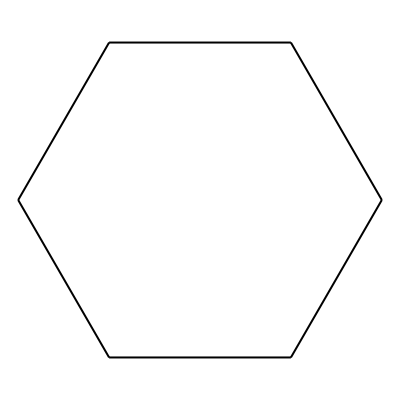
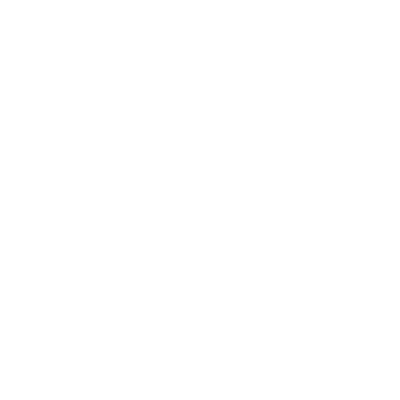
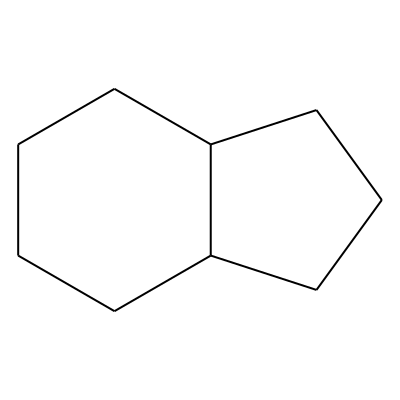
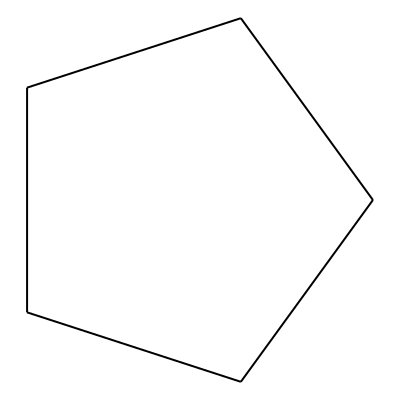
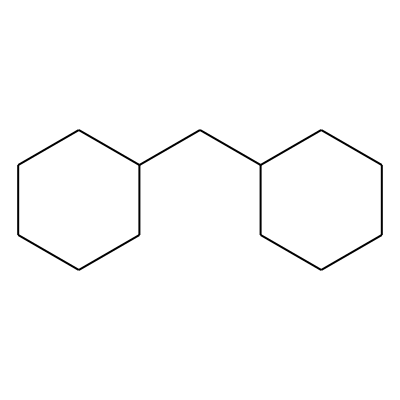

In [91]:
HTML(drugbank_scaffold_counts.head().to_html(formatters = {"molecule": mol2display_png}, escape = False))

In [104]:
drugbank_scaffold_counts["scaffold_probability"] = drugbank_scaffold_counts["scaffold_smiles"].apply(lambda x: (x / len(drugbank_df)) * 100)
drugbank_scaffold_counts

,scaffold_smiles,molecule,scaffold_percentage,scaffold_probability
C1CCCCC1,1039,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a2f80>,14.602952,14.602952
,982,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a23f0>,13.801827,13.801827
C1CCC2CCCC2C1,192,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a1530>,2.698524,2.698524
C1CCCC1,188,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a13a0>,2.642305,2.642305
C1CCC(CC2CCCCC2)CC1,182,<rdkit.Chem.rdchem.Mol object at 0x7f9ea78a14e0>,2.557976,2.557976
...,...,...,...,...
C(CCCCC1CCCC1)CCCC1CCCCC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92d00>,0.014055,0.014055
C1CCC(CCC2CCCC(CC3CCCC(C4CCCCC4)C3)C2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92b70>,0.014055,0.014055
C1CCC(CCC2CCC3CC(CC4CCCC(CC5CCC6CC(CCC7CCCCC7)CCC6C5)C4)CCC3C2)CC1,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92c60>,0.014055,0.014055
C1CC2CCC1CC2,1,<rdkit.Chem.rdchem.Mol object at 0x7f9ebaf92c10>,0.014055,0.014055


In [117]:
merged_scaffold_counts = pd.merge(data_scaffold_counts, drugbank_scaffold_counts, left_index = True, right_index = True)
merged_scaffold_counts["probability_ratio"] = merged_scaffold_counts["scaffold_probability_x"] / merged_scaffold_counts["scaffold_probability_y"]
merged_scaffold_counts.sort_values("probability_ratio", ascending = False, inplace = True)

,molecule_x,probability_ratio
C1CCC(CCC2CCC(CC3CCCCC4CCCCC43)CC2)CC1,,107.740245
C1CCC(C2CCC(CC3CCCCC4CCCCC43)CC2)C1,,87.020967
C1CCC2C(C1)CCC2CC1CCC2(CC1)CCC1CCCCC12,,58.013978
C1CCCCC(CC2CCCCC2)CCC(CC2CCCCC2)CCCCCCCC(CC2CCCC2)CCC1,,56.632693
C1CCC(CC2CCCC(C3CC4CCCCC4C3)C2)CC1,,33.150844

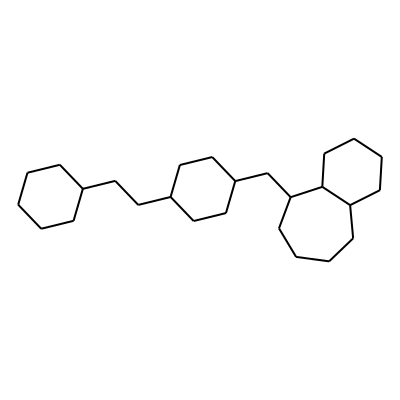
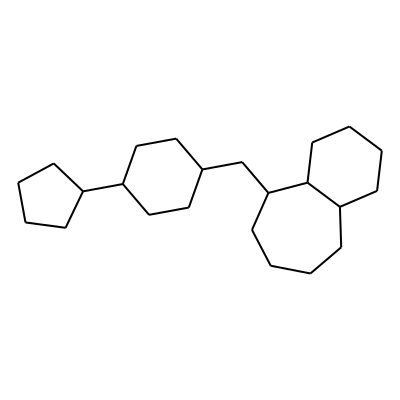
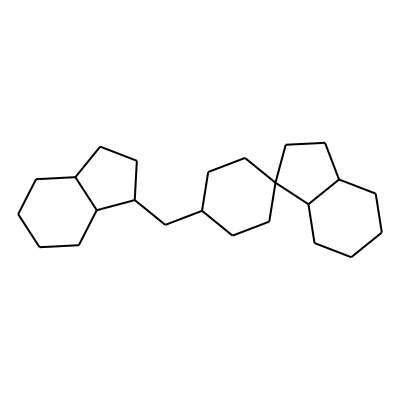
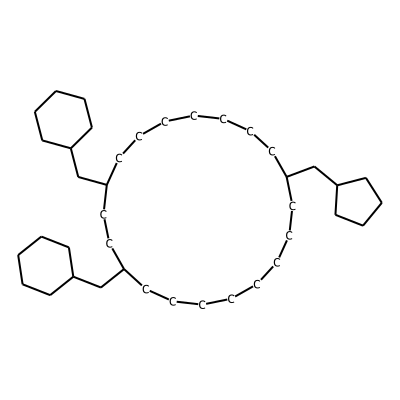
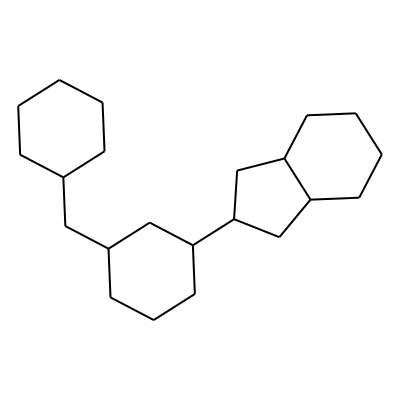

In [124]:
# scaffolds more common in vasopressin dataset
HTML(merged_scaffold_counts[["molecule_x", "probability_ratio"]].head().to_html(formatters = {"molecule_x": mol2display_png}, escape = False))

,molecule_x,probability_ratio
C1CCC2C(C1)CCC1CCCCC12,,0.230214
C1CCC(CCC2CCC(CC3CCCCC3)CC2)CC1,,0.218098
C1CCC(CC2CCC3CCCCC3C2)CC1,,0.188357
C1CCC(CC2CCCC3CCCCC32)CC1,,0.159379
C1CCC2C(C1)CCC2C1CCCC1,,0.074889

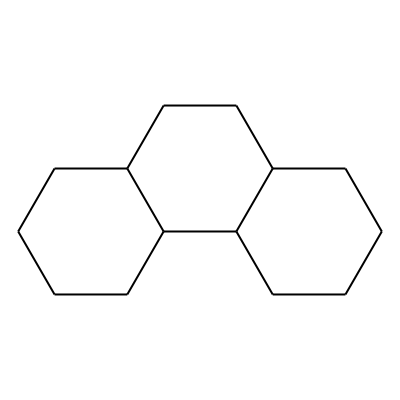
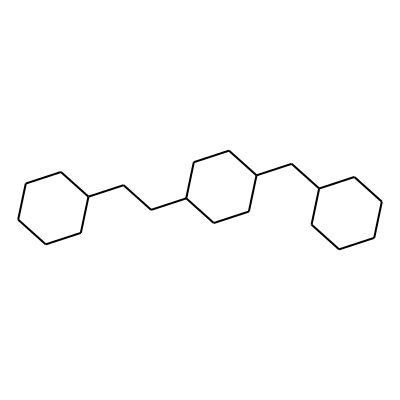
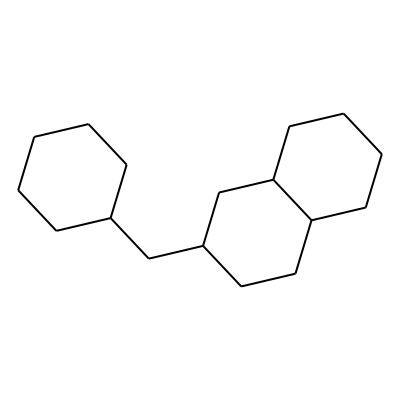
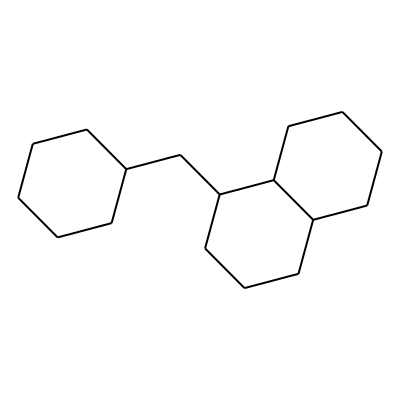
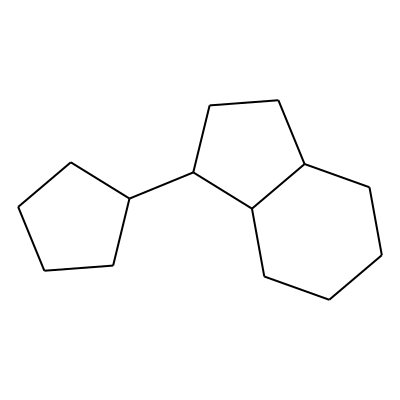

In [123]:
# scaffolds more common in DrugBank dataset
HTML(merged_scaffold_counts[["molecule_x", "probability_ratio"]].tail().to_html(formatters = {"molecule_x": mol2display_png}, escape = False))